In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd_data = pd.read_csv('내국인출국교통수단별_20230302165039.csv',encoding='cp949',header=1)

pd_data.columns = ['시점','공항','항구']
pd_data.head()

,시점,공항,항구
0,2022.01,938,3279
1,2022.02,855,3179
2,2022.03,986,3418
3,2022.04,1823,3158
4,2022.05,3418,3231


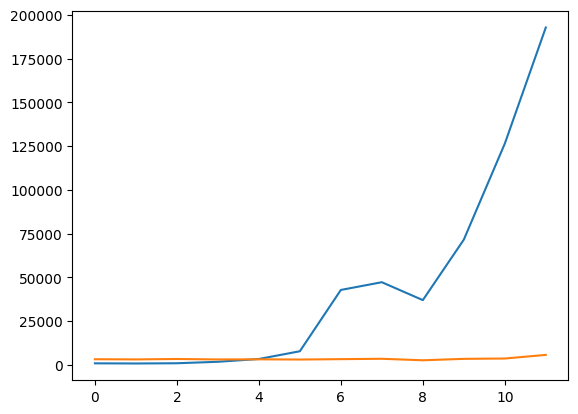

In [14]:
_, axe = plt.subplots()
axe.plot(pd_data['공항'])
axe.plot(pd_data['항구'])

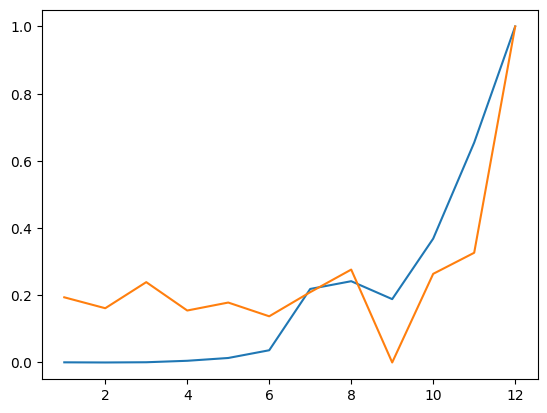

In [45]:
#normalization

def normal(pd_data,x):
    min_x = pd_data[x].min()
    max_x = pd_data[x].max()
    pd_data[x+'norm'] = pd_data[x].apply(lambda x :(x-min_x)/(max_x-min_x))
    return pd_data[x+'norm']

# air_min = pd_data['공항'].min()
# air_max = pd_data['공항'].max()

# shep_min = pd_data['항구'].min()
# shep_max = pd_data['항구'].max()

# pd_data['공항_norm'] = pd_data['공항'].apply(lambda x : (x-air_min)/(air_max-air_min))
# pd_data['항구_norm'] = pd_data['항구'].apply(lambda x : (x-shep_min)/(shep_max-shep_min))

# normal(pd_data,'공항')
# normal(pd_data,'항구')
mo =(pd_data['시점']%1)*100
_, axe = plt.subplots()
axe.plot(mo,normal(pd_data,'공항'))
axe.plot(mo,normal(pd_data,'항구'))

Text(0.5, 0, 'month')

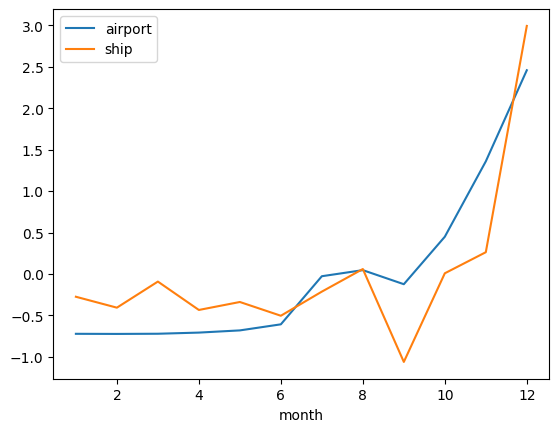

In [44]:
#standardlization

def std(pd_data,x):
    x_mean = pd_data[x].mean()
    x_std = pd_data[x].std()
    pd_data[x+'_std'] = pd_data[x].apply(lambda x: (x-x_mean)/x_std)
    return pd_data[x+'_std']


_, axe = plt.subplots()
mo =(pd_data['시점']%1)*100
axe.plot(mo,std(pd_data,'공항'),label = 'airport')
axe.plot(mo,std(pd_data,'항구'),label = 'ship')
axe.legend()
axe.set_xlabel('month')

In [23]:
# 2015부터 2022년까지 추이

pd_data2 = pd.read_csv('내국인출국교통수단별_20230302172125.csv',encoding='cp949',header = 1)
pd_data2.columns = ['시점','공항','항구']
pd_data2.head()

,시점,공항,항구
0,2015,2477493,561465
1,2016,3159822,598968
2,2017,3714190,708523
3,2018,4056259,712585
4,2019,3853804,458732


Text(0.5, 0, 'year')

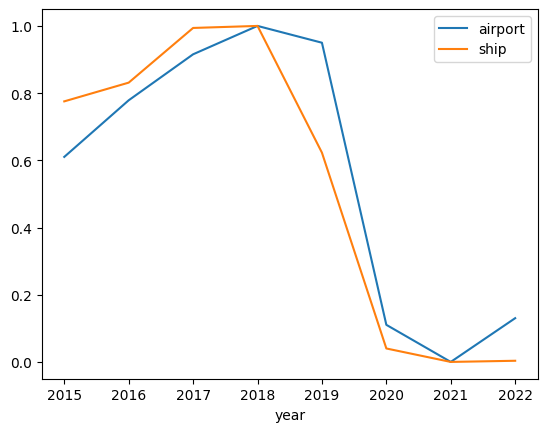

In [36]:
_,axe = plt.subplots()
#normal
axe.plot(pd_data2['시점'],normal(pd_data2,'공항'),label = 'airport')
axe.plot(pd_data2['시점'],normal(pd_data2,'항구'),label = 'ship')
axe.legend()
axe.set_xlabel('year')

Text(0.5, 0, 'year')

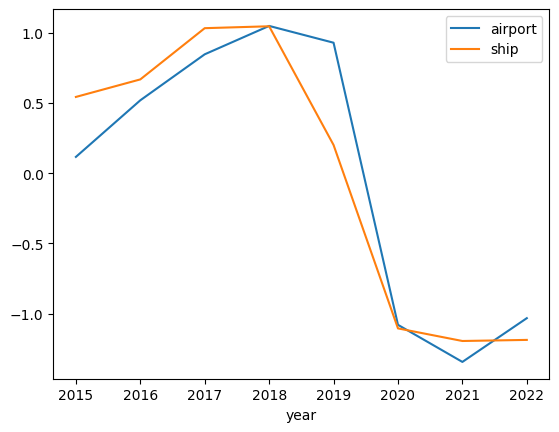

In [37]:
#standardlization

_,axe = plt.subplots()
axe.plot(pd_data2['시점'],std(pd_data2,'공항'),label = 'airport')
axe.plot(pd_data2['시점'],std(pd_data2,'항구'),label = 'ship')
axe.legend()
axe.set_xlabel('year')

In [ ]:
#2022 연말에 공항 이용객이 증가하였음
# 2022년 연말에 공항 출국 인원이 늘어난 것이 항구 출국인원에도 반영되었는가
# 연말에 출국인원이 증가하는 것이 일반적인 추이인가 -> 코로나 이전/이후 연도별 추이
str_time = pd_data['시점'].astype('str')
yr = str_time.apply(lambda x: x.split('.')[0])
mo = str_time.apply(lambda x: x.split('.')[1])
